- **Pedro Alonso Lopez Torres**
- **Elisa Ottoboni**

# Exercise 1: Analytical exercises

## a) Expression for Ridge regression

Show that the optimal parameters are equal to

$$
\hat{\boldsymbol{\beta}}_{\text{Ridge}} = \left( \mathbf{X}^T\mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^T \mathbf{y}
$$

with $\mathbf{I}$ being a $p \times p$ identity matrix.

We start by expressing the optimization formula of $\operatorname{MSE}$, our cost function $C(\boldsymbol{\beta})$, with the addition of a regularization parameter $\lambda$

$$
\min_{\boldsymbol{\beta} \in \mathbb{R}^p} \frac{1}{n} \| \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \|_2^2 + \lambda \| \boldsymbol{\beta} \|_2^2
$$

where we have used the definition of a norm-2 vector, that is

$$
\| \mathbf{x} \|_2 = \sqrt{ \sum_i x_i^2 }
$$

In order to obtain the $\hat{\boldsymbol{\beta}}_{\text{Ridge}}$ parameters, we start by expanding the above $\operatorname{MSE}$ equation

\begin{align*}
C(\boldsymbol{\beta}) 
& = \frac{1}{n} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + \lambda \boldsymbol{\beta}^T \boldsymbol{\beta} \\
& = \frac{1}{n} (\mathbf{y}^T \mathbf{y} - \mathbf{y}^T \mathbf{X} \boldsymbol{\beta} - \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{y} + \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\beta}) + \lambda \boldsymbol{\beta}^T \boldsymbol{\beta} \\
& = \frac{1}{n} \left( \mathbf{y}^T \mathbf{y} - 2 \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{y} + \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} \right) + \lambda \boldsymbol{\beta}^T \boldsymbol{\beta}
\end{align*}


Now, we take the derivative of $C(\boldsymbol{\beta})$ with respect to $\boldsymbol{\beta}$ and set it equal to 0 to minimize it 
(we have followed the instructions for derivation from the lecture notes for week 35: https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/week35.html)

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = - \frac{2}{n} \mathbf{y}^T \mathbf{X} + \frac{2}{n} \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{X} + 2 \lambda \boldsymbol{\beta}^T = 0
$$

$$
-\mathbf{y}^T \mathbf{X} + \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{X} + n \lambda \boldsymbol{\beta}^T = 0
$$

We then rearrange the terms to isolate $\boldsymbol{\beta}$

$$
-\mathbf{y}^T \mathbf{X} + \boldsymbol{\beta}^T(\mathbf{X}^T \mathbf{X} + n \lambda \mathbf{I}) = 0
$$

$$
\boldsymbol{\beta}^T = \mathbf{y}^T \mathbf{X} (\mathbf{X}^T \mathbf{X} + n \lambda \mathbf{I})
$$

Since $\lambda$ is a number, we rewrite $n\lambda$ as just $\lambda$, knowing that this could be considered an abuse of notation. Finally, we obtain the expression for the optimal Ridge regression parameters.

$$
\hat{\boldsymbol{\beta}}_{\text{Ridge}} = \left( \mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^T \mathbf{y}
$$

### Beta OLS

At this point, we also derive the $\hat{\boldsymbol{\beta}}_{\text{OLS}}$ parameters, to show the similarities with the $\hat{\boldsymbol{\beta}}_{\text{Ridge}}$ ones. 

We start by expanding our cost function $C(\beta)$, equal to $\operatorname{MSE}$

\begin{align*}
C(\boldsymbol{\beta}) 
& = \frac{1}{n} \left( \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \right)^T \left( \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \right) \\
& = \frac{1}{n} \left( \mathbf{y}^T\mathbf{y} - \mathbf{y}^T\mathbf{X}\boldsymbol{\beta} - \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} \right) \\
& = \frac{1}{n} \left( \mathbf{y}^T\mathbf{y} - 2\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} \right)
\end{align*}

We can now differentiate it and set it to 0

$$
\frac{dC(\boldsymbol{\beta})}{d\boldsymbol{\beta}} = 0
$$

$$
-2\mathbf{y}^T\mathbf{X} + 2\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X} = 0
$$

$$
2\left( -\mathbf{y}^T\mathbf{X} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X} \right) = 0
$$

$$
\boldsymbol{\beta}^T = \mathbf{y}^T\mathbf{X} \left( \mathbf{X}^T\mathbf{X} \right)^{-1}
$$

Finally, we obtain the parameters we were looking for

$$
\hat{\boldsymbol{\beta}}_{\text{OLS}} = \left( \mathbf{X}^T\mathbf{X} \right)^{-1}\mathbf{X}^T\mathbf{y}
$$

## b) The singular value decomposition

### OLS

We have to show that we can write our OLS solutions in the following way

$$
\tilde{y}_{\text{OLS}} = \mathbf{X}\boldsymbol{\beta} = \sum_{j=0}^{p-1} \mathbf{u}_j \mathbf{u}_j^T \mathbf{y}
$$

In order to do so, we will adopt the notion of SVD (Singular Value Decomposition), that allows us to rewrite the feature matrix as follows

$$
\mathbf{X} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T
$$

where $\mathbf{U}$ and $\mathbf{V}$ are orthogonal matrices of dimensions $n \times n$ and $p \times p$, respectively, and $\boldsymbol{\Sigma}$ is an $n \times p$ matrix which contains the singular values only. 

\begin{align*}
\tilde{\mathbf{y}}_{\text{OLS}} 
& = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \boldsymbol{\beta} \\
& = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \left( (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} \right) \\
& = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T (\mathbf{V} \boldsymbol{\Sigma}^T \mathbf{U}^T \cdot \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T)^{-1} \mathbf{V} \boldsymbol{\Sigma}^T \mathbf{U}^T \mathbf{y} \\
\end{align*}

Given that $\mathbf{U}$ is an orthogonal matrix, its matrix multiplication with its transpose $\mathbf{U^T}$ is equal to the identity matrix.

$$
\tilde{\mathbf{y}}_{\text{OLS}} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T (\mathbf{V} \boldsymbol{\Sigma}^T \boldsymbol{\Sigma} \mathbf{V}^T)^{-1} \mathbf{V} \boldsymbol{\Sigma}^T \mathbf{U}^T \mathbf{y}
$$

Now, given that also $\mathbf{V}$ is an orthogonal matrix, we can write that $\mathbf{V} \mathbf{V}^T = \mathbf{V}^T \mathbf{V} = \mathbf{I}$ and $\mathbf{V^T} = \mathbf{V^{-1}}$

$$
\tilde{\mathbf{y}}_{\text{OLS}} = \mathbf{U} \boldsymbol{\Sigma} (\boldsymbol{\Sigma}^T \boldsymbol{\Sigma})^{-1} \boldsymbol{\Sigma}^T \mathbf{U}^T \mathbf{y} 
$$

Finally, given that we can rewrite $\boldsymbol{\Sigma} (\boldsymbol{\Sigma}^T\boldsymbol{\Sigma})^{-1} \boldsymbol{\Sigma}$ as $\mathbf{I}$ since $\boldsymbol{\Sigma} \boldsymbol{\Sigma}^T$ is diagonal, we obtain

\begin{align*}
\tilde{\mathbf{y}}_{\text{OLS}} 
& = \mathbf{U} \mathbf{U}^T \mathbf{y} \\
& = \sum_{i=0}^{p-1} \mathbf{u}_i \mathbf{u}_i^T \tilde{\mathbf{y}}\\
\end{align*}

### Ridge

For Ridge regression, we have to show that the corresponding equation is

$$
\tilde{\mathbf{y}}_{\text{Ridge}} = \mathbf{X} \boldsymbol{\beta}_{\text{Ridge}} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \left( \mathbf{V} \boldsymbol{\Sigma}^2 \mathbf{V}^T + \lambda \mathbf{I} \right)^{-1} \left( \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \right)^T \mathbf{y} = \sum_{j=0}^{p-1} \mathbf{u}_j \mathbf{u}_j^T \frac{\sigma_j^2}{\sigma_j^2 + \lambda} \mathbf{y}
$$

with the vectors $\mathbf{u}_j$ being the columns of $\mathbf{U}$ from the SVD of the matrix $\mathbf{X}$.


\begin{align*}
\tilde{\mathbf{y}}_{\text{Ridge}}
& = \mathbf{X} \left( \mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^T \mathbf{y} \\
& = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \left( \mathbf{V} \boldsymbol{\Sigma}^T \mathbf{U}^T \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T + \lambda \mathbf{I} \right)^{-1} \mathbf{V} \boldsymbol{\Sigma}^T \mathbf{U}^T \mathbf{y} \\
& = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \left( \mathbf{V} \left( \boldsymbol{\Sigma}^T \boldsymbol{\Sigma} \right) \mathbf{V}^T + \lambda \mathbf{I} \right)^{-1} \mathbf{V} \boldsymbol{\Sigma}^T \mathbf{U}^T \mathbf{y} \\
& = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \left( \mathbf{V} \left( \boldsymbol{\Sigma}^T \boldsymbol{\Sigma} + \lambda \mathbf{I} \right) \mathbf{V}^T \right)^{-1} \mathbf{V} \boldsymbol{\Sigma}^T \mathbf{U}^T \mathbf{y} \\
& = \mathbf{U} \boldsymbol{\Sigma} \left( \boldsymbol{\Sigma}^T \boldsymbol{\Sigma} + \lambda \mathbf{I} \right)^{-1} \boldsymbol{\Sigma}^T \mathbf{U}^T \mathbf{y}\\
& = \sum_{j=0}^{p-1} \mathbf{u}_j \mathbf{u}_j^T \frac{\sigma_j^2}{\sigma_j^2 + \lambda} \mathbf{y}
\end{align*}

The last step shows how Ridge regression reduces the influence of components associated with small singular values (which may be more sensitive to error or noise), thus reducing the risk of overfitting.

# Exercise 2: Adding Ridge Regression

In [1]:
# linear algebra
import numpy as np                 

#visualization
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from prettytable import PrettyTable

In [2]:
np.random.seed(315)
n = 100
x = np.random.rand(n)
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x - 2)**2) + np.random.normal(0, 0.1, x.shape)

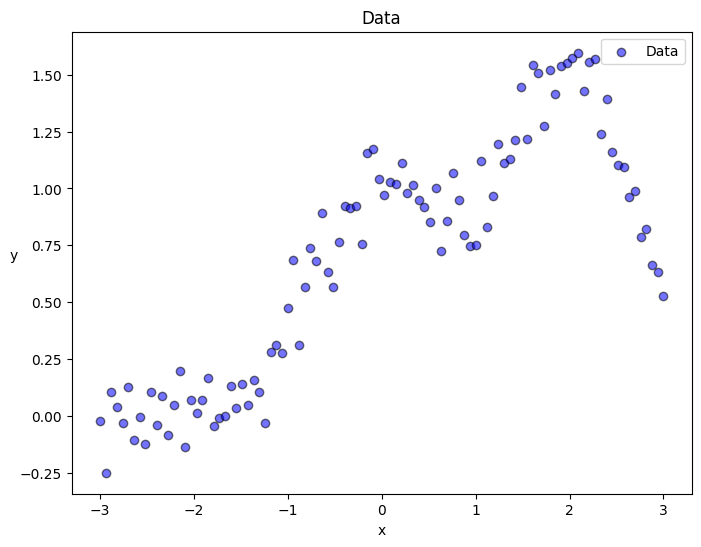

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Data')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Data')
plt.legend()
plt.show()

In [4]:
def matrix_creation(n, p):                              # n represents the number of rows (observations), 
                                                        # while p represents the number of columns (features)
    X = np.ones((n, p))
    for i in range(len(x)):
        for j in range(p):
            X[i,j] = X[i,j] * (x[i]**j).item()
    return X[:,1:]

## Degree 5

+---------------------------------+------------------------+----------------------+----------------------+   +--------------------------------+------------------------+----------------------+----------------------+
|                                 | Ordinary least squares |        Ridge         |     Scikit-learn     |   |                                | Ordinary least squares |        Ridge         |     Scikit-learn     |
+---------------------------------+------------------------+----------------------+----------------------+   +--------------------------------+------------------------+----------------------+----------------------+
| MSE Train set (lambda = 0.0001) |  0.02438558350876297   | 0.024385583509314444 | 0.024385583509314447 |   | R2 Train set (lambda = 0.0001) |   0.9088250810477333   |  0.9088250810456714  |  0.9088250810456714  |
|  MSE Test set (lambda = 0.0001) |  0.04751853338523283   | 0.047518621854179405 | 0.047518621854183644 |   | R2 Test set (lambda = 0.0001)

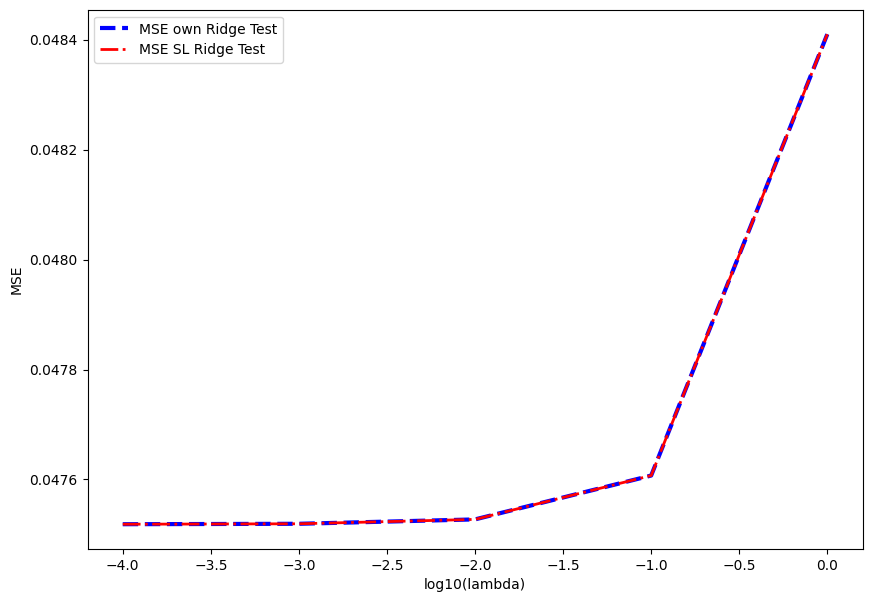

In [5]:
p = 6
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
identity = np.eye(p-1,p-1)
X = matrix_creation(n,p)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_mean = np.mean(X_train,axis=0)
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean

y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler  

# ---------------------- OLS ----------------------
beta_OLS = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
intercept_ols = y_scaler - X_train_mean @ beta_OLS 
y_train_pred_ols = X_train_scaled @ beta_OLS + y_scaler
y_test_pred_ols = X_test_scaled @ beta_OLS + y_scaler

MSE_train_ols_5 = mean_squared_error(y_train, y_train_pred_ols)
MSE_test_ols_5 = mean_squared_error(y_test, y_test_pred_ols)
R2_train_ols_5 = r2_score(y_train, y_train_pred_ols)
R2_test_ols_5 = r2_score(y_test, y_test_pred_ols)

# ---------------------- Ridge----------------------
MSE_train_ridge_5 = []
MSE_test_ridge_5 = []
R2_train_ridge_5 = []
R2_test_ridge_5 = []

for l in range(len(lambdas)):
    beta_Ridge = np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lambdas[l]*identity) @ X_train_scaled.T @ (y_train_scaled)
    intercept_ridge = y_scaler - X_train_mean @ beta_Ridge 
    y_train_pred_ridge = X_train_scaled @ beta_Ridge + y_scaler
    y_test_pred_ridge = X_test_scaled @ beta_Ridge + y_scaler

    MSE_train_ridge_5.append(mean_squared_error(y_train, y_train_pred_ridge))
    MSE_test_ridge_5.append(mean_squared_error(y_test, y_test_pred_ridge))
    R2_train_ridge_5.append(r2_score(y_train, y_train_pred_ridge))
    R2_test_ridge_5.append(r2_score(y_test, y_test_pred_ridge))
    
# ---------------------- Scikit-learn ----------------------
MSE_train_ridge_sk_5 = []
MSE_test_ridge_sk_5 = []
R2_train_ridge_sk_5 = []
R2_test_ridge_sk_5 = []

for l in range(len(lambdas)):
    model_ridge = Ridge(alpha = lambdas[l])
    model_ridge.fit(X_train, y_train)
    y_train_pred_ridge_sk = model_ridge.predict(X_train)
    y_test_pred_ridge_sk = model_ridge.predict(X_test)

    MSE_train_ridge_sk_5.append(mean_squared_error(y_train, y_train_pred_ridge_sk))
    MSE_test_ridge_sk_5.append(mean_squared_error(y_test, y_test_pred_ridge_sk))
    R2_train_ridge_sk_5.append(r2_score(y_train, y_train_pred_ridge_sk))
    R2_test_ridge_sk_5.append(r2_score(y_test, y_test_pred_ridge_sk))


# ---------------------- Results ----------------------
def print_tables_side_by_side(table1, table2):
    table1_lines = table1.get_string().splitlines()
    table2_lines = table2.get_string().splitlines()

    for line1, line2 in zip(table1_lines, table2_lines):
        print(f"{line1}   {line2}")

mse_table = PrettyTable()

field_names = ["", "Ordinary least squares", "Ridge", "Scikit-learn"]
mse_table.field_names = field_names

for l in range(len(lambdas)):
    mse_table.add_row([f"MSE Train set (lambda = {lambdas[l]})", MSE_train_ols_5, MSE_train_ridge_5[l], MSE_train_ridge_sk_5[l]])
    mse_table.add_row([f"MSE Test set (lambda = {lambdas[l]})", MSE_test_ols_5, MSE_test_ridge_5[l], MSE_test_ridge_sk_5[l]])
    if l != len(lambdas)-1:
        mse_table.add_row(['-' * 20] * len(field_names))

r2_table = PrettyTable()

field_names = ["", "Ordinary least squares", "Ridge", "Scikit-learn"]
r2_table.field_names = field_names

for l in range(len(lambdas)):
    r2_table.add_row([f"R2 Train set (lambda = {lambdas[l]})", R2_train_ols_5, R2_train_ridge_5[l], R2_train_ridge_sk_5[l]])
    r2_table.add_row([f"R2 Test set (lambda = {lambdas[l]})", R2_test_ols_5, R2_test_ridge_5[l], R2_test_ridge_sk_5[l]])
    if l != len(lambdas)-1:
        r2_table.add_row(['-' * 20] * len(field_names))

print_tables_side_by_side(mse_table, r2_table)

plt.figure(figsize = (10, 7))
plt.plot(np.log10(lambdas), MSE_test_ridge_5, 'b--', label = 'MSE own Ridge Test', linewidth = 3)
plt.plot(np.log10(lambdas), MSE_test_ridge_sk_5, 'r-.', label = 'MSE SL Ridge Test', linewidth = 2)
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

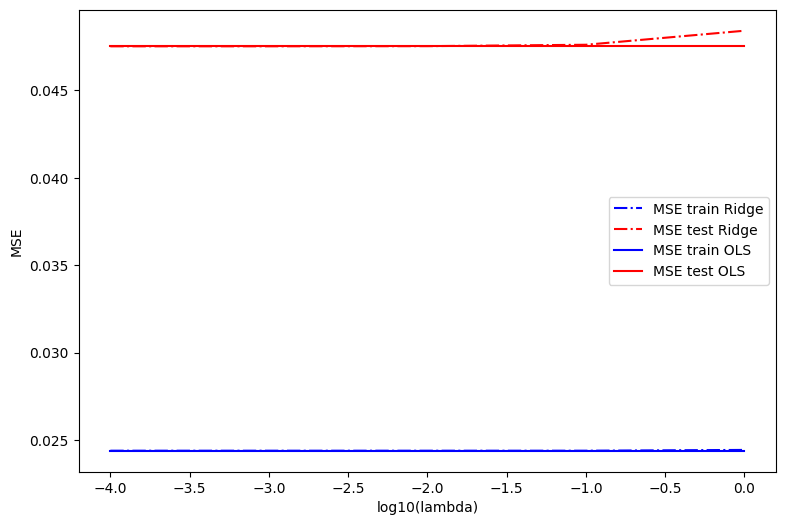

In [6]:
# Difference between training and test MSE with OLS and Ridge

plt.figure(figsize = (9, 6))
plt.plot(np.log10(lambdas), MSE_train_ridge_5, 'b-.', label = 'MSE train Ridge')
plt.plot(np.log10(lambdas), MSE_test_ridge_5, 'r-.', label = 'MSE test Ridge')
plt.plot(np.log10(lambdas), np.ones(5)*MSE_train_ols_5, 'b-', label = 'MSE train OLS')
plt.plot(np.log10(lambdas), np.ones(5)*MSE_test_ols_5, 'r-', label = 'MSE test OLS')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Degree 10

+---------------------------------+------------------------+----------------------+----------------------+   +--------------------------------+------------------------+----------------------+----------------------+
|                                 | Ordinary least squares |        Ridge         |     Scikit-learn     |   |                                | Ordinary least squares |        Ridge         |     Scikit-learn     |
+---------------------------------+------------------------+----------------------+----------------------+   +--------------------------------+------------------------+----------------------+----------------------+
| MSE Train set (lambda = 0.0001) |  0.009997348605733678  | 0.009997348765007973 | 0.009997348764626933 |   | R2 Train set (lambda = 0.0001) |   0.9628651376233346   |  0.9628651370317148  |  0.9628651370331301  |
|  MSE Test set (lambda = 0.0001) |   0.0156538933087146   | 0.01565371457334995  | 0.01565371443086983  |   | R2 Test set (lambda = 0.0001)

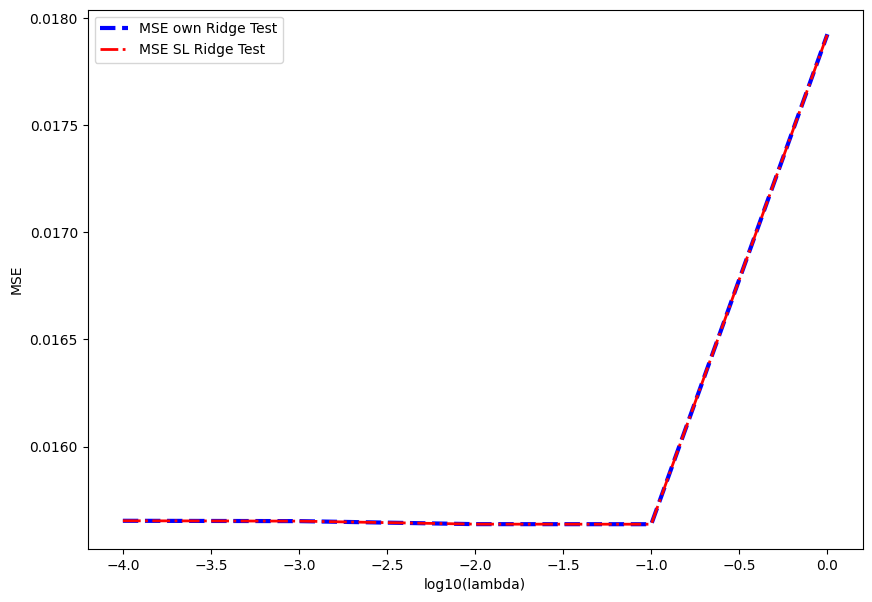

In [7]:
p = 11
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
identity = np.eye(p-1,p-1)
X = matrix_creation(n,p)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_mean = np.mean(X_train,axis=0)
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean

y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler  

# ---------------------- OLS ----------------------
beta_OLS = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
intercept_ols = y_scaler - X_train_mean @ beta_OLS 
y_train_pred_ols = X_train_scaled @ beta_OLS + y_scaler
y_test_pred_ols = X_test_scaled @ beta_OLS + y_scaler

MSE_train_ols_10 = mean_squared_error(y_train, y_train_pred_ols)
MSE_test_ols_10 = mean_squared_error(y_test, y_test_pred_ols)
R2_train_ols_10 = r2_score(y_train, y_train_pred_ols)
R2_test_ols_10 = r2_score(y_test, y_test_pred_ols)

# ---------------------- Ridge----------------------
MSE_train_ridge_10 = []
MSE_test_ridge_10 = []
R2_train_ridge_10 = []
R2_test_ridge_10 = []

for l in range(len(lambdas)):
    beta_Ridge = np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lambdas[l]*identity) @ X_train_scaled.T @ (y_train_scaled)
    intercept_ridge = y_scaler - X_train_mean @ beta_Ridge 
    y_train_pred_ridge = X_train_scaled @ beta_Ridge + y_scaler
    y_test_pred_ridge = X_test_scaled @ beta_Ridge + y_scaler

    MSE_train_ridge_10.append(mean_squared_error(y_train, y_train_pred_ridge))
    MSE_test_ridge_10.append(mean_squared_error(y_test, y_test_pred_ridge))
    R2_train_ridge_10.append(r2_score(y_train, y_train_pred_ridge))
    R2_test_ridge_10.append(r2_score(y_test, y_test_pred_ridge))
    
# ---------------------- Scikit-learn ----------------------
MSE_train_ridge_sk_10 = []
MSE_test_ridge_sk_10 = []
R2_train_ridge_sk_10 = []
R2_test_ridge_sk_10 = []

for l in range(len(lambdas)):
    model_ridge = Ridge(alpha = lambdas[l])
    model_ridge.fit(X_train, y_train)
    y_train_pred_ridge_sk = model_ridge.predict(X_train)
    y_test_pred_ridge_sk = model_ridge.predict(X_test)

    MSE_train_ridge_sk_10.append(mean_squared_error(y_train, y_train_pred_ridge_sk))
    MSE_test_ridge_sk_10.append(mean_squared_error(y_test, y_test_pred_ridge_sk))
    R2_train_ridge_sk_10.append(r2_score(y_train, y_train_pred_ridge_sk))
    R2_test_ridge_sk_10.append(r2_score(y_test, y_test_pred_ridge_sk))


# ---------------------- Results ----------------------
def print_tables_side_by_side(table1, table2):
    table1_lines = table1.get_string().splitlines()
    table2_lines = table2.get_string().splitlines()

    for line1, line2 in zip(table1_lines, table2_lines):
        print(f"{line1}   {line2}")

mse_table = PrettyTable()

field_names = ["", "Ordinary least squares", "Ridge", "Scikit-learn"]
mse_table.field_names = field_names

for l in range(len(lambdas)):
    mse_table.add_row([f"MSE Train set (lambda = {lambdas[l]})", MSE_train_ols_10, MSE_train_ridge_10[l], MSE_train_ridge_sk_10[l]])
    mse_table.add_row([f"MSE Test set (lambda = {lambdas[l]})", MSE_test_ols_10, MSE_test_ridge_10[l], MSE_test_ridge_sk_10[l]])
    if l != len(lambdas)-1:
        mse_table.add_row(['-' * 20] * len(field_names))

r2_table = PrettyTable()

field_names = ["", "Ordinary least squares", "Ridge", "Scikit-learn"]
r2_table.field_names = field_names

for l in range(len(lambdas)):
    r2_table.add_row([f"R2 Train set (lambda = {lambdas[l]})", R2_train_ols_10, R2_train_ridge_10[l], R2_train_ridge_sk_10[l]])
    r2_table.add_row([f"R2 Test set (lambda = {lambdas[l]})", R2_test_ols_10, R2_test_ridge_10[l], R2_test_ridge_sk_10[l]])
    if l != len(lambdas)-1:
        r2_table.add_row(['-' * 20] * len(field_names))

print_tables_side_by_side(mse_table, r2_table)

plt.figure(figsize = (10, 7))
plt.plot(np.log10(lambdas), MSE_test_ridge_10, 'b--', label = 'MSE own Ridge Test', linewidth = 3)
plt.plot(np.log10(lambdas), MSE_test_ridge_sk_10, 'r-.', label = 'MSE SL Ridge Test', linewidth = 2)
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

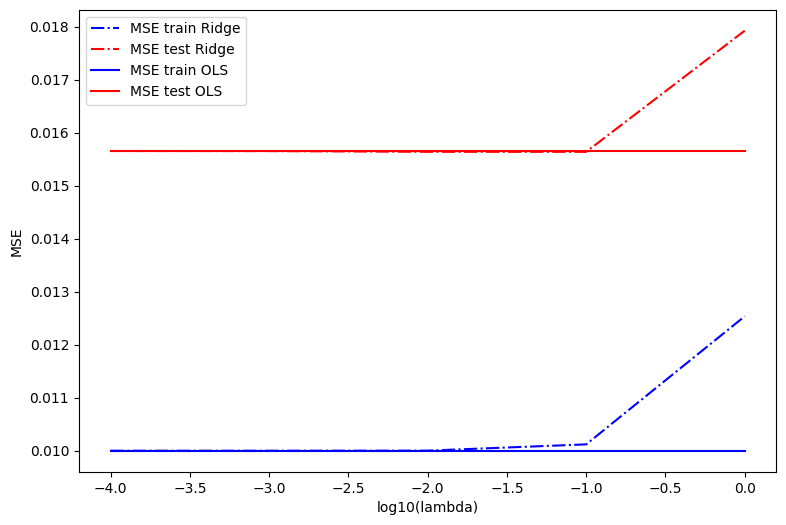

In [8]:
# Difference between training and test MSE with OLS and Ridge

plt.figure(figsize = (9, 6))
plt.plot(np.log10(lambdas), MSE_train_ridge_10, 'b-.', label = 'MSE train Ridge')
plt.plot(np.log10(lambdas), MSE_test_ridge_10, 'r-.', label = 'MSE test Ridge')
plt.plot(np.log10(lambdas), np.ones(5)*MSE_train_ols_10, 'b-', label = 'MSE train OLS')
plt.plot(np.log10(lambdas), np.ones(5)*MSE_test_ols_10, 'r-', label = 'MSE test OLS')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Degree 15

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.19688e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.27677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.0792e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


+---------------------------------+------------------------+----------------------+----------------------+   +--------------------------------+------------------------+----------------------+----------------------+
|                                 | Ordinary least squares |        Ridge         |     Scikit-learn     |   |                                | Ordinary least squares |        Ridge         |     Scikit-learn     |
+---------------------------------+------------------------+----------------------+----------------------+   +--------------------------------+------------------------+----------------------+----------------------+
| MSE Train set (lambda = 0.0001) |  0.008700838105965971  | 0.00926614499316317  | 0.008700842257042164 |   | R2 Train set (lambda = 0.0001) |   0.969004994858331    |  0.9669912015131492  |  0.9690049800709477  |
|  MSE Test set (lambda = 0.0001) |   0.0402817520368508   | 0.03613825861574835  | 0.04028406128435834  |   | R2 Test set (lambda = 0.0001)

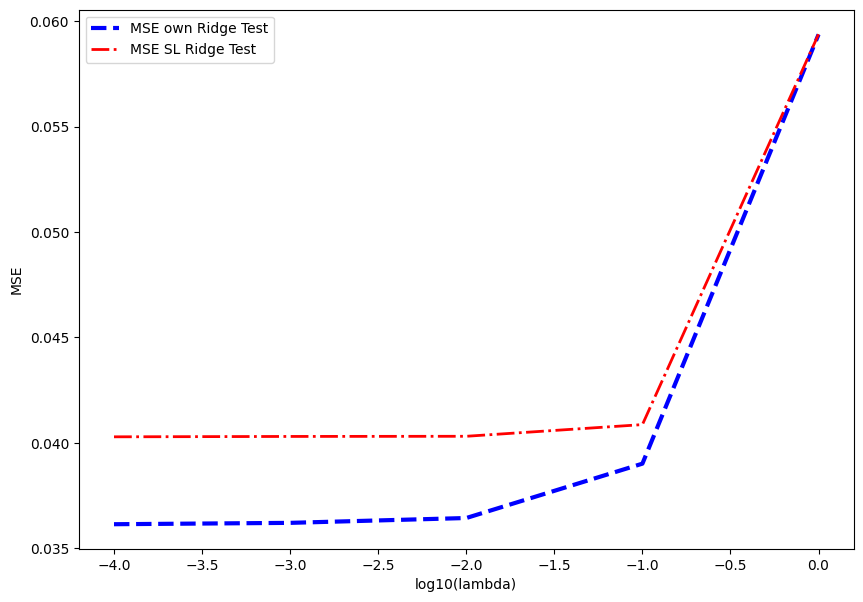

In [9]:
p = 16
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
identity = np.eye(p-1,p-1)
X = matrix_creation(n,p)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_mean = np.mean(X_train,axis=0)
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean

y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler  

# ---------------------- OLS ----------------------
beta_OLS = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
intercept_ols = y_scaler - X_train_mean @ beta_OLS 
y_train_pred_ols = X_train_scaled @ beta_OLS + y_scaler
y_test_pred_ols = X_test_scaled @ beta_OLS + y_scaler

MSE_train_ols_15 = mean_squared_error(y_train, y_train_pred_ols)
MSE_test_ols_15 = mean_squared_error(y_test, y_test_pred_ols)
R2_train_ols_15 = r2_score(y_train, y_train_pred_ols)
R2_test_ols_15 = r2_score(y_test, y_test_pred_ols)

# ---------------------- Ridge----------------------
MSE_train_ridge_15 = []
MSE_test_ridge_15 = []
R2_train_ridge_15 = []
R2_test_ridge_15 = []

for l in range(len(lambdas)):
    beta_Ridge = np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lambdas[l]*identity) @ X_train_scaled.T @ (y_train_scaled)
    intercept_ridge = y_scaler - X_train_mean @ beta_Ridge 
    y_train_pred_ridge = X_train_scaled @ beta_Ridge + y_scaler
    y_test_pred_ridge = X_test_scaled @ beta_Ridge + y_scaler

    MSE_train_ridge_15.append(mean_squared_error(y_train, y_train_pred_ridge))
    MSE_test_ridge_15.append(mean_squared_error(y_test, y_test_pred_ridge))
    R2_train_ridge_15.append(r2_score(y_train, y_train_pred_ridge))
    R2_test_ridge_15.append(r2_score(y_test, y_test_pred_ridge))
    
# ---------------------- Scikit-learn ----------------------
MSE_train_ridge_sk_15 = []
MSE_test_ridge_sk_15 = []
R2_train_ridge_sk_15 = []
R2_test_ridge_sk_15 = []

for l in range(len(lambdas)):
    model_ridge = Ridge(alpha = lambdas[l])
    model_ridge.fit(X_train, y_train)
    y_train_pred_ridge_sk = model_ridge.predict(X_train)
    y_test_pred_ridge_sk = model_ridge.predict(X_test)

    MSE_train_ridge_sk_15.append(mean_squared_error(y_train, y_train_pred_ridge_sk))
    MSE_test_ridge_sk_15.append(mean_squared_error(y_test, y_test_pred_ridge_sk))
    R2_train_ridge_sk_15.append(r2_score(y_train, y_train_pred_ridge_sk))
    R2_test_ridge_sk_15.append(r2_score(y_test, y_test_pred_ridge_sk))


# ---------------------- Results ----------------------
def print_tables_side_by_side(table1, table2):
    table1_lines = table1.get_string().splitlines()
    table2_lines = table2.get_string().splitlines()

    for line1, line2 in zip(table1_lines, table2_lines):
        print(f"{line1}   {line2}")

mse_table = PrettyTable()

field_names = ["", "Ordinary least squares", "Ridge", "Scikit-learn"]
mse_table.field_names = field_names

for l in range(len(lambdas)):
    mse_table.add_row([f"MSE Train set (lambda = {lambdas[l]})", MSE_train_ols_15, MSE_train_ridge_15[l], MSE_train_ridge_sk_15[l]])
    mse_table.add_row([f"MSE Test set (lambda = {lambdas[l]})", MSE_test_ols_15, MSE_test_ridge_15[l], MSE_test_ridge_sk_15[l]])
    if l != len(lambdas)-1:
        mse_table.add_row(['-' * 20] * len(field_names))

r2_table = PrettyTable()

field_names = ["", "Ordinary least squares", "Ridge", "Scikit-learn"]
r2_table.field_names = field_names

for l in range(len(lambdas)):
    r2_table.add_row([f"R2 Train set (lambda = {lambdas[l]})", R2_train_ols_15, R2_train_ridge_15[l], R2_train_ridge_sk_15[l]])
    r2_table.add_row([f"R2 Test set (lambda = {lambdas[l]})", R2_test_ols_15, R2_test_ridge_15[l], R2_test_ridge_sk_15[l]])
    if l != len(lambdas)-1:
        r2_table.add_row(['-' * 20] * len(field_names))

print_tables_side_by_side(mse_table, r2_table)

plt.figure(figsize = (10, 7))
plt.plot(np.log10(lambdas), MSE_test_ridge_15, 'b--', label = 'MSE own Ridge Test', linewidth = 3)
plt.plot(np.log10(lambdas), MSE_test_ridge_sk_15, 'r-.', label = 'MSE SL Ridge Test', linewidth = 2)
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

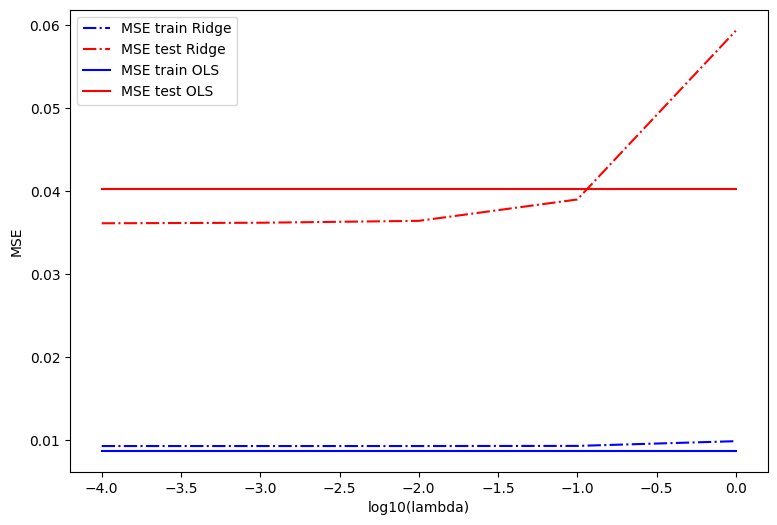

In [10]:
# Difference between training and test MSE with OLS and Ridge

plt.figure(figsize = (9, 6))
plt.plot(np.log10(lambdas), MSE_train_ridge_15, 'b-.', label = 'MSE train Ridge')
plt.plot(np.log10(lambdas), MSE_test_ridge_15, 'r-.', label = 'MSE test Ridge')
plt.plot(np.log10(lambdas), np.ones(5)*MSE_train_ols_15, 'b-', label = 'MSE train OLS')
plt.plot(np.log10(lambdas), np.ones(5)*MSE_test_ols_15, 'r-', label = 'MSE test OLS')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Discussion about the Results:

**Comparison between the Ridge created by us and the Ridge with Scikit-learn**

It can be seen that the first two graphs present a perfect correspondence between the two methods, while in the third graph, although the trend obtained by the two methods is very similar, it can be seen that the MSE obtained with scikit-learn remains higher, this discrepancy is most probably due to the ill-conditioning of the Feature Matrix, as it is a Vandermonde matrix.

However, in all three cases, a strong increase in the MSE can be seen for larger lambda values, but this is in line with the expected behaviour of Ridge regression, where excessive regularisation degrades the performance of the model.


**Comparison of MSE training and MSE tests with Ordinary Least Squares and Ridge regression**

1. *OLS:*  
The MSE is lower than the Ridge Regression, indicating a higher overall accuracy. In this case, the MSE values for train and test are identical, which could indicate that the OLS model fits both the training and test data well, with no obvious signs of overfitting or underfitting. Furthermore, the value of R² is rather high, showing that the model explains the variability of the data well in both training and test phases.

2. *Ridge:*  
The MSE of the Ridge is higher than the OLS, but this suggests that the Ridge model may have a greater ability to generalise and better handle the noise in the data. Although the R² is lower than OLS and explains a lower amount of variance, the reduced MSE suggests that the Ridge model is less prone to overfitting and more robust to variations in the data.

3. *Final consideration:*  
Although the OLS model has a very high R², the MSE values suggest that it may be more prone to overfitting, especially in the presence of multicollinearity or noise in the data. In contrast, the Ridge Regression, with a slightly lower R² but lower MSE, seems to be more stable and less prone to overfitting, making it a better choice for handling complex data or data with multicollinearity.

## Citations

We solved the assignment using Professor Morten Hjorth-Jensen's notes for the course *‘FYS-STK4155 - Applied Data Analysis and Machine Learning’*, autumn 2024 and the previous assignment from week 35.

The following link refers to the professor's lectures we used:

https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/week36.html

We also used tools provided by the Scikit-learn library:

https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html, Pedregosa et al, JMLR 12, pp. 2825-2830, 2011.